### 專案名稱: 第四屆機器學習百日馬拉松
### 功能描述: 第80天作業
### 版權所有:   
### 程式撰寫: Dunk  
### 撰寫日期：2020/06/09
### 改版日期:  
### 改版備註:

# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

### ANS:
#### 參考解答了

In [1]:
import os
import keras
import itertools

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]

In [7]:
results = {}
for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(opti))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.SGD'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000

50000/50000 [==============================] - 8s 168us/step - loss: 0.7805 - accuracy: 0.7216 - val_loss: 1.6496 - val_accuracy: 0.4773
Epoch 49/50
50000/50000 [==============================] - 8s 167us/step - loss: 0.7570 - accuracy: 0.7296 - val_loss: 1.8216 - val_accuracy: 0.4618
Epoch 50/50
50000/50000 [==============================] - 9s 171us/step - loss: 0.7374 - accuracy: 0.7381 - val_loss: 1.7735 - val_accuracy: 0.4692
Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.RMSprop'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________

50000/50000 [==============================] - 10s 207us/step - loss: 2.3084 - accuracy: 0.0995 - val_loss: 2.3093 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 10s 206us/step - loss: 2.3076 - accuracy: 0.0998 - val_loss: 2.3104 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 10s 205us/step - loss: 2.3077 - accuracy: 0.0990 - val_loss: 2.3139 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 10s 208us/step - loss: 2.3079 - accuracy: 0.1009 - val_loss: 2.3141 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 10s 207us/step - loss: 2.3081 - accuracy: 0.0996 - val_loss: 2.3162 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 10s 209us/step - loss: 2.3077 - accuracy: 0.1020 - val_loss: 2.3094 - val_accuracy: 0.1000
Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.Adagrad'>
Model: "model_1"
_________________

50000/50000 [==============================] - 10s 199us/step - loss: 1.4930 - accuracy: 0.4658 - val_loss: 1.6270 - val_accuracy: 0.4264
Epoch 43/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.4787 - accuracy: 0.4706 - val_loss: 1.6502 - val_accuracy: 0.4205
Epoch 44/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.4738 - accuracy: 0.4711 - val_loss: 1.5887 - val_accuracy: 0.4318
Epoch 45/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.4717 - accuracy: 0.4756 - val_loss: 1.5884 - val_accuracy: 0.4338
Epoch 46/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.4661 - accuracy: 0.4753 - val_loss: 1.5228 - val_accuracy: 0.4560
Epoch 47/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.4631 - accuracy: 0.4766 - val_loss: 1.5402 - val_accuracy: 0.4523
Epoch 48/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.4605 - accuracy: 0.4771 - va

50000/50000 [==============================] - 12s 235us/step - loss: 2.3070 - accuracy: 0.1016 - val_loss: 2.3224 - val_accuracy: 0.1000
Epoch 40/50
50000/50000 [==============================] - 12s 235us/step - loss: 2.3066 - accuracy: 0.0999 - val_loss: 2.3207 - val_accuracy: 0.1000
Epoch 41/50
50000/50000 [==============================] - 12s 234us/step - loss: 2.3074 - accuracy: 0.0994 - val_loss: 2.3269 - val_accuracy: 0.1000
Epoch 42/50
50000/50000 [==============================] - 12s 236us/step - loss: 2.3080 - accuracy: 0.0996 - val_loss: 2.3232 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 12s 235us/step - loss: 2.3072 - accuracy: 0.0984 - val_loss: 2.3196 - val_accuracy: 0.0998
Epoch 44/50
50000/50000 [==============================] - 12s 236us/step - loss: 2.3071 - accuracy: 0.1001 - val_loss: 2.3216 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 12s 237us/step - loss: 2.3069 - accuracy: 0.1021 - va

50000/50000 [==============================] - 9s 179us/step - loss: 1.3335 - accuracy: 0.5303 - val_loss: 1.4974 - val_accuracy: 0.4716
Epoch 37/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.3252 - accuracy: 0.5335 - val_loss: 1.5897 - val_accuracy: 0.4437
Epoch 38/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.3154 - accuracy: 0.5380 - val_loss: 1.3936 - val_accuracy: 0.4980
Epoch 39/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.3019 - accuracy: 0.5412 - val_loss: 1.3882 - val_accuracy: 0.5028
Epoch 40/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.3019 - accuracy: 0.5404 - val_loss: 1.4053 - val_accuracy: 0.5006
Epoch 41/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.2973 - accuracy: 0.5417 - val_loss: 1.4317 - val_accuracy: 0.4850
Epoch 42/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.2855 - accuracy: 0.5477 - val_loss:

50000/50000 [==============================] - 11s 212us/step - loss: 1.8710 - accuracy: 0.3080 - val_loss: 2.0755 - val_accuracy: 0.2466
Epoch 34/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.8712 - accuracy: 0.3088 - val_loss: 1.9730 - val_accuracy: 0.2685
Epoch 35/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.8696 - accuracy: 0.3086 - val_loss: 1.8578 - val_accuracy: 0.3080
Epoch 36/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.8718 - accuracy: 0.3090 - val_loss: 1.9350 - val_accuracy: 0.2788
Epoch 37/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.8665 - accuracy: 0.3079 - val_loss: 1.9389 - val_accuracy: 0.2808
Epoch 38/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.8659 - accuracy: 0.3089 - val_loss: 1.8718 - val_accuracy: 0.2985
Epoch 39/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.8675 - accuracy: 0.3088 - va

50000/50000 [==============================] - 10s 201us/step - loss: 1.2217 - accuracy: 0.5694 - val_loss: 1.3830 - val_accuracy: 0.5170
Epoch 31/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.2090 - accuracy: 0.5745 - val_loss: 1.4023 - val_accuracy: 0.5084
Epoch 32/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.1993 - accuracy: 0.5776 - val_loss: 1.4950 - val_accuracy: 0.4858
Epoch 33/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.1940 - accuracy: 0.5824 - val_loss: 1.4452 - val_accuracy: 0.4930
Epoch 34/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.1839 - accuracy: 0.5857 - val_loss: 1.3923 - val_accuracy: 0.5130
Epoch 35/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.1731 - accuracy: 0.5884 - val_loss: 1.3960 - val_accuracy: 0.5129
Epoch 36/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.1653 - accuracy: 0.5910 - va

50000/50000 [==============================] - 12s 233us/step - loss: 1.6518 - accuracy: 0.4042 - val_loss: 1.6830 - val_accuracy: 0.3932
Epoch 28/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.6566 - accuracy: 0.4043 - val_loss: 1.7246 - val_accuracy: 0.3694
Epoch 29/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.6452 - accuracy: 0.4081 - val_loss: 1.6664 - val_accuracy: 0.3821
Epoch 30/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.6370 - accuracy: 0.4109 - val_loss: 1.6800 - val_accuracy: 0.3976
Epoch 31/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.6500 - accuracy: 0.4049 - val_loss: 1.6892 - val_accuracy: 0.3873
Epoch 32/50
50000/50000 [==============================] - 12s 236us/step - loss: 1.6455 - accuracy: 0.4084 - val_loss: 1.6658 - val_accuracy: 0.3936
Epoch 33/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.6513 - accuracy: 0.4040 - va

50000/50000 [==============================] - 9s 177us/step - loss: 1.7941 - accuracy: 0.3753 - val_loss: 1.7963 - val_accuracy: 0.3758
Epoch 25/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.7880 - accuracy: 0.3768 - val_loss: 1.7897 - val_accuracy: 0.3791
Epoch 26/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.7821 - accuracy: 0.3806 - val_loss: 1.7836 - val_accuracy: 0.3782
Epoch 27/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.7765 - accuracy: 0.3819 - val_loss: 1.7788 - val_accuracy: 0.3827
Epoch 28/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.7710 - accuracy: 0.3842 - val_loss: 1.7728 - val_accuracy: 0.3835
Epoch 29/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.7655 - accuracy: 0.3851 - val_loss: 1.7673 - val_accuracy: 0.3809
Epoch 30/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.7601 - accuracy: 0.3883 - val_loss:

50000/50000 [==============================] - 11s 211us/step - loss: 1.2251 - accuracy: 0.5631 - val_loss: 1.6065 - val_accuracy: 0.4472
Epoch 22/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.2069 - accuracy: 0.5679 - val_loss: 1.5175 - val_accuracy: 0.4758
Epoch 23/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.1864 - accuracy: 0.5773 - val_loss: 1.6459 - val_accuracy: 0.4568
Epoch 24/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.1705 - accuracy: 0.5826 - val_loss: 1.5054 - val_accuracy: 0.4843
Epoch 25/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.1518 - accuracy: 0.5882 - val_loss: 1.5058 - val_accuracy: 0.4867
Epoch 26/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.1307 - accuracy: 0.5941 - val_loss: 1.4766 - val_accuracy: 0.4958
Epoch 27/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.1123 - accuracy: 0.6021 - va

50000/50000 [==============================] - 10s 199us/step - loss: 1.4452 - accuracy: 0.4952 - val_loss: 1.5138 - val_accuracy: 0.4624
Epoch 19/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.4349 - accuracy: 0.4998 - val_loss: 1.5155 - val_accuracy: 0.4606
Epoch 20/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.4262 - accuracy: 0.5017 - val_loss: 1.4723 - val_accuracy: 0.4761
Epoch 21/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.4193 - accuracy: 0.5040 - val_loss: 1.4880 - val_accuracy: 0.4694
Epoch 22/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.4092 - accuracy: 0.5072 - val_loss: 1.4601 - val_accuracy: 0.4828
Epoch 23/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.4026 - accuracy: 0.5131 - val_loss: 1.4501 - val_accuracy: 0.4863
Epoch 24/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.3949 - accuracy: 0.5135 - va

50000/50000 [==============================] - 12s 232us/step - loss: 1.2249 - accuracy: 0.5655 - val_loss: 1.3717 - val_accuracy: 0.5147
Epoch 16/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.2080 - accuracy: 0.5695 - val_loss: 1.3604 - val_accuracy: 0.5167
Epoch 17/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.1720 - accuracy: 0.5846 - val_loss: 1.3753 - val_accuracy: 0.5209
Epoch 18/50
50000/50000 [==============================] - 12s 239us/step - loss: 1.1597 - accuracy: 0.5859 - val_loss: 1.3628 - val_accuracy: 0.5274
Epoch 19/50
50000/50000 [==============================] - 12s 239us/step - loss: 1.1313 - accuracy: 0.6006 - val_loss: 1.3429 - val_accuracy: 0.5296
Epoch 20/50
50000/50000 [==============================] - 12s 238us/step - loss: 1.1149 - accuracy: 0.6032 - val_loss: 1.3838 - val_accuracy: 0.5185
Epoch 21/50
50000/50000 [==============================] - 12s 239us/step - loss: 1.1048 - accuracy: 0.6053 - va

50000/50000 [==============================] - 9s 176us/step - loss: 2.1963 - accuracy: 0.2170 - val_loss: 2.1907 - val_accuracy: 0.2198
Epoch 13/50
50000/50000 [==============================] - 9s 177us/step - loss: 2.1886 - accuracy: 0.2224 - val_loss: 2.1832 - val_accuracy: 0.2269
Epoch 14/50
50000/50000 [==============================] - 9s 177us/step - loss: 2.1811 - accuracy: 0.2269 - val_loss: 2.1759 - val_accuracy: 0.2317
Epoch 15/50
50000/50000 [==============================] - 9s 176us/step - loss: 2.1739 - accuracy: 0.2324 - val_loss: 2.1688 - val_accuracy: 0.2360
Epoch 16/50
50000/50000 [==============================] - 9s 178us/step - loss: 2.1669 - accuracy: 0.2362 - val_loss: 2.1619 - val_accuracy: 0.2387
Epoch 17/50
50000/50000 [==============================] - 9s 177us/step - loss: 2.1602 - accuracy: 0.2396 - val_loss: 2.1553 - val_accuracy: 0.2419
Epoch 18/50
50000/50000 [==============================] - 9s 176us/step - loss: 2.1536 - accuracy: 0.2436 - val_loss:

50000/50000 [==============================] - 11s 222us/step - loss: 1.4903 - accuracy: 0.4728 - val_loss: 1.5279 - val_accuracy: 0.4523
Epoch 10/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.4651 - accuracy: 0.4831 - val_loss: 1.4996 - val_accuracy: 0.4698
Epoch 11/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.4425 - accuracy: 0.4915 - val_loss: 1.5298 - val_accuracy: 0.4560
Epoch 12/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.4235 - accuracy: 0.4955 - val_loss: 1.4595 - val_accuracy: 0.4798
Epoch 13/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.4038 - accuracy: 0.5055 - val_loss: 1.4589 - val_accuracy: 0.4780
Epoch 14/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.3830 - accuracy: 0.5149 - val_loss: 1.5318 - val_accuracy: 0.4502
Epoch 15/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.3673 - accuracy: 0.5178 - va

50000/50000 [==============================] - 10s 203us/step - loss: 1.8278 - accuracy: 0.3659 - val_loss: 1.8263 - val_accuracy: 0.3598
Epoch 7/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.8152 - accuracy: 0.3704 - val_loss: 1.8144 - val_accuracy: 0.3691
Epoch 8/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.8046 - accuracy: 0.3738 - val_loss: 1.8041 - val_accuracy: 0.3737
Epoch 9/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.7945 - accuracy: 0.3777 - val_loss: 1.7963 - val_accuracy: 0.3746
Epoch 10/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.7857 - accuracy: 0.3808 - val_loss: 1.7879 - val_accuracy: 0.3782
Epoch 11/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.7777 - accuracy: 0.3839 - val_loss: 1.7802 - val_accuracy: 0.3794
Epoch 12/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.7704 - accuracy: 0.3865 - val_l

50000/50000 [==============================] - 12s 235us/step - loss: 1.6309 - accuracy: 0.4251 - val_loss: 1.6044 - val_accuracy: 0.4329
Epoch 4/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.5726 - accuracy: 0.4461 - val_loss: 1.5789 - val_accuracy: 0.4440
Epoch 5/50
50000/50000 [==============================] - 13s 252us/step - loss: 1.5286 - accuracy: 0.4636 - val_loss: 1.5153 - val_accuracy: 0.4640
Epoch 6/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.4905 - accuracy: 0.4739 - val_loss: 1.5057 - val_accuracy: 0.4672
Epoch 7/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.4599 - accuracy: 0.4865 - val_loss: 1.4919 - val_accuracy: 0.4746
Epoch 8/50
50000/50000 [==============================] - 12s 236us/step - loss: 1.4298 - accuracy: 0.4982 - val_loss: 1.4662 - val_accuracy: 0.4782
Epoch 9/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.4006 - accuracy: 0.5088 - val_loss

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 226us/step - loss: 2.3196 - accuracy: 0.1160 - val_loss: 2.3156 - val_accuracy: 0.1170
Epoch 2/50
50000/50000 [==============================] - 11s 222us/step - loss: 2.3162 - accuracy: 0.1174 - val_loss: 2.3123 - val_accuracy: 0.1183
Epoch 3/50
50000/50000 [==============================] - 11s 222us/step - loss: 2.3129 - accuracy: 0.1187 - val_loss: 2.3091 - val_accuracy: 0.1184
Epoch 4/50
50000/50000 [==============================] - 11s 226us/step - loss: 2.3098 - accuracy: 0.1202 - val_loss: 2.3060 - val_accuracy: 0.1192
Epoch 5/50
50000/50000 [==============================] - 11s 224us/step - loss: 2.3068 - accuracy: 0.1217 - val_loss: 2.3031 - val_accuracy: 0.1217
Epoch 6/50
50000/50000 [==============================] - 11s 221us/step - loss: 2.3040 - accuracy: 0.1235 - val_loss: 2.3003 - val_accuracy: 0.1242
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 282us/step - loss: 2.1301 - accuracy: 0.2504 - val_loss: 2.0137 - val_accuracy: 0.3013
Epoch 2/50
50000/50000 [==============================] - 14s 277us/step - loss: 1.9598 - accuracy: 0.3232 - val_loss: 1.9092 - val_accuracy: 0.3382
Epoch 3/50
50000/50000 [==============================] - 14s 277us/step - loss: 1.8817 - accuracy: 0.3477 - val_loss: 1.8588 - val_accuracy: 0.3512
Epoch 4/50
50000/50000 [==============================] - 14s 277us/step - loss: 1.8345 - accuracy: 0.3618 - val_loss: 1.8154 - val_accuracy: 0.3664
Epoch 5/50
50000/50000 [==============================] - 14s 273us/step - loss: 1.7991 - accuracy: 0.3737 - val_loss: 1.7932 - val_accuracy: 0.3722
Epoch 6/50
50000/50000 [==============================] - 14s 271us/step - loss: 1.7714 - accuracy: 0.3834 - val_loss: 1.7598 - val_accuracy: 0.3821
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 260us/step - loss: 2.2609 - accuracy: 0.1689 - val_loss: 2.2317 - val_accuracy: 0.2117
Epoch 2/50
50000/50000 [==============================] - 13s 257us/step - loss: 2.2181 - accuracy: 0.2208 - val_loss: 2.2044 - val_accuracy: 0.2324
Epoch 3/50
50000/50000 [==============================] - 13s 257us/step - loss: 2.1956 - accuracy: 0.2348 - val_loss: 2.1852 - val_accuracy: 0.2457
Epoch 4/50
50000/50000 [==============================] - 13s 256us/step - loss: 2.1787 - accuracy: 0.2457 - val_loss: 2.1701 - val_accuracy: 0.2535
Epoch 5/50
50000/50000 [==============================] - 13s 265us/step - loss: 2.1648 - accuracy: 0.2549 - val_loss: 2.1575 - val_accuracy: 0.2559
Epoch 6/50
50000/50000 [==============================] - 13s 260us/step - loss: 2.1529 - accuracy: 0.2603 - val_loss: 2.1464 - val_accuracy: 0.2646
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 306us/step - loss: 2.1374 - accuracy: 0.2466 - val_loss: 2.0082 - val_accuracy: 0.3040
Epoch 2/50
50000/50000 [==============================] - 15s 299us/step - loss: 1.9467 - accuracy: 0.3258 - val_loss: 1.8969 - val_accuracy: 0.3409
Epoch 3/50
50000/50000 [==============================] - 15s 305us/step - loss: 1.8638 - accuracy: 0.3519 - val_loss: 1.8388 - val_accuracy: 0.3502
Epoch 4/50
50000/50000 [==============================] - 15s 304us/step - loss: 1.8133 - accuracy: 0.3675 - val_loss: 1.7925 - val_accuracy: 0.3763
Epoch 5/50
50000/50000 [==============================] - 15s 291us/step - loss: 1.7738 - accuracy: 0.3818 - val_loss: 1.7626 - val_accuracy: 0.3860
Epoch 6/50
50000/50000 [==============================] - 15s 299us/step - loss: 1.7449 - accuracy: 0.3910 - val_loss: 1.7381 - val_accuracy: 0.3974
Epoch 7/50
50000/50000 [==============================] 

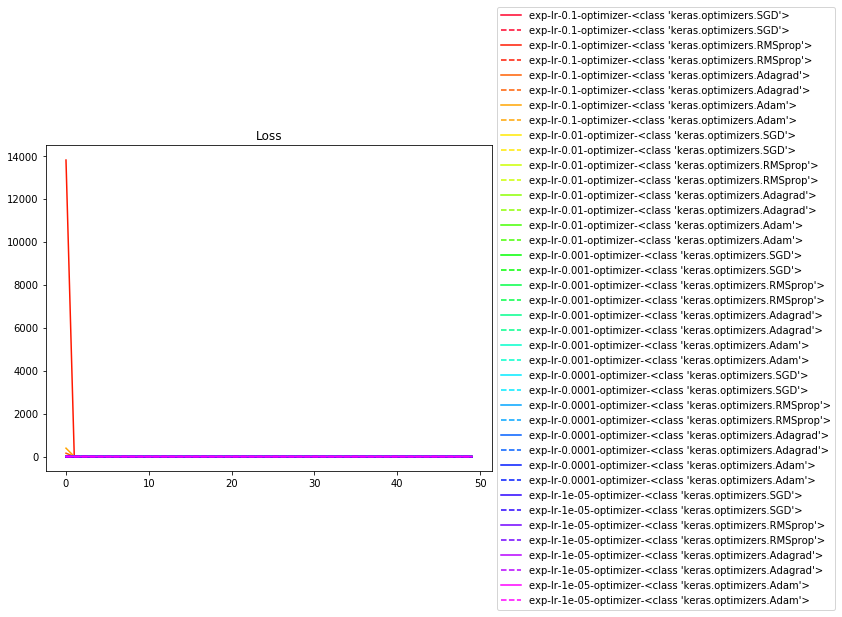

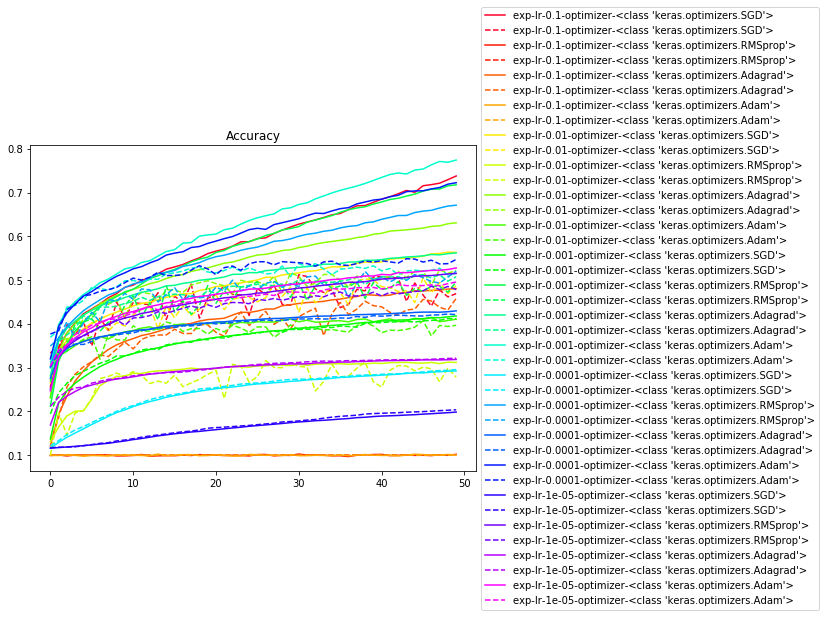

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()